# Prediction of next possible data 
## for [ 110, 125, 133, 146, 158, 172, 187, 196, 210, ? ]

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

2022-01-29 22:19:12.763323: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-29 22:19:12.763905: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Preparing independent and dependent features

In [2]:
def prepare_data(timeseries_data,n_features):
    X,Y=[],[]
    for i in range(len(timeseries_data)):
        end_ix=i + n_features
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        Y.append(seq_y)
    return np.array(X), np.array(Y)



In [3]:
# Define input sequence
timeseries_data=[110, 125, 133, 146, 158, 172, 187, 196, 210]
    
# Chose the number of time steps
n_steps=3

# Split into samples

X,Y=prepare_data(timeseries_data, n_steps)


In [4]:
print(X), print(Y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [7]:
X.shape

(6, 3, 1)

## Building LSTM model

In [8]:
# define Model

model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(n_steps, n_features)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit model

model.fit(X,Y, epochs=300, verbose=1)


2022-01-29 22:19:18.275321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-29 22:19:18.275388: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-29 22:19:18.275452: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HP): /proc/driver/nvidia/version does not exist
2022-01-29 22:19:18.276273: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 32613.4590
Epoch 2/300
1/1 [==============================] - 0s 12ms/step - loss: 32399.2598
Epoch 3/300
1/1 [==============================] - 0s 18ms/step - loss: 32118.3887
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 31756.2734
Epoch 5/300
1/1 [==============================] - 0s 15ms/step - loss: 31301.9629
Epoch 6/300
1/1 [==============================] - 0s 16ms/step - loss: 30773.0938
Epoch 7/300
1/1 [==============================] - 0s 17ms/step - loss: 30239.3457
Epoch 8/300
1/1 [==============================] - 0s 13ms/step - loss: 29765.9121
Epoch 9/300
1/1 [==============================] - 0s 23ms/step - loss: 29349.5449
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 28948.4316
Epoch 11/300
1/1 [==============================] - 0s 17ms/step - loss: 28546.5098
Epoch 12/300
1/1 [==============================] - 0s 18ms/step - loss: 28134.0547
Epo

In [9]:
x = [187, 196, 210]
x=np.asarray(x)
print(x)
temp_input=list(x)
print(temp_input)

[187 196 210]
[187, 196, 210]


In [10]:
# demonstrate prediction for next 10 days

x_input = [187, 196, 210]
x_input=np.asarray(x_input)

temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.asarray(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[225.75896]
1 day input [196.         210.         225.75895691]
1 day output [[237.90749]]
2 day input [210.         225.75895691 237.90748596]
2 day output [[253.46407]]
3 day input [225.75896 237.90749 253.46407]
3 day output [[269.50113]]
4 day input [237.90749 253.46407 269.50113]
4 day output [[284.50137]]
5 day input [253.46407 269.50113 284.50137]
5 day output [[301.8322]]
6 day input [269.50113 284.50137 301.8322 ]
6 day output [[319.5087]]
7 day input [284.50137 301.8322  319.5087 ]
7 day output [[337.40234]]
8 day input [301.8322  319.5087  337.40234]
8 day output [[357.0411]]
9 day input [319.5087  337.40234 357.0411 ]
9 day output [[377.25305]]
[225.75896, 237.90749, 253.46407, 269.50113, 284.50137, 301.8322, 319.5087, 337.40234, 357.0411, 377.25305]


In [11]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [12]:
len(timeseries_data)

9

In [13]:
lst_output

[225.75896,
 237.90749,
 253.46407,
 269.50113,
 284.50137,
 301.8322,
 319.5087,
 337.40234,
 357.0411,
 377.25305]

In [14]:
lst=[170, 180, 190]
print(lst)

[170, 180, 190]


## Visualizaing the output

Time series data [110, 125, 133, 146, 158, 172, 187, 196, 210]
lst_output [225.75896, 237.90749, 253.46407, 269.50113, 284.50137, 301.8322, 319.5087, 337.40234, 357.0411, 377.25305]


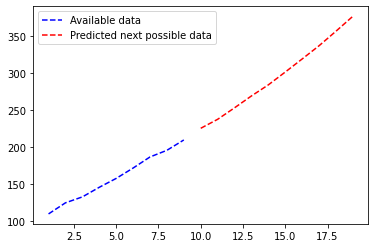

In [22]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

plt.plot(day_new, timeseries_data, "b--", label="Available data")
plt.plot(day_pred, lst_output, "r--", label="Predicted next possible data")
plt.legend(loc='upper left')
print("Time series data",timeseries_data)
print("lst_output",lst_output)
